# Bike Users Characteristics on Their Trip Durations
## by Amgad Mohamed Abdelghfar

## Investigation Overview

> In this investigation, I looked at the characteristics of bike users that could be used to predict their trip durations. And the main focus was on four attributes: days of february, user age, user gender, and user type

## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system covering in 2019. The trip duration variable's unit had to be changed from seconds to minutes due to unreasonable unit of measure.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df=pd.read_csv('201902-fordgobike-tripdata.csv')

In [1]:
import numpy as np

In [4]:
array_1 = np.array([[1, 2, 7], [3, 4, 8]])
array_2 = np.array([[1, 2], [3, 9], [4, 16]])
np.dot(array_1, array_2)

array([[ 35, 132],
       [ 47, 170]])

In [2]:
X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of Trip Duration 

> Trip duration in the dataset take on very large range of values, 1 minutes at the lowest, to about 1400 minutes at the highest. Plotted on a logarithmic scale, the distribution of prices takes on a unimodal shape, with a peak at around 10 minutes

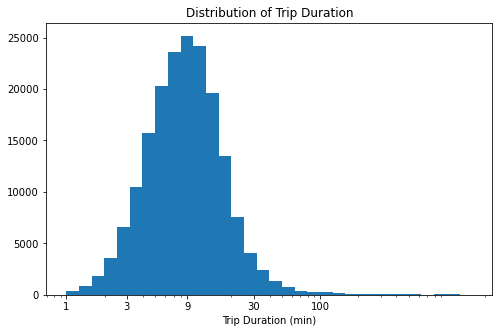

In [3]:
# plotting trip duration on log scale on the x-axis
df['duration_min'] = df['duration_sec'] / 60
logbin = 0.1
bins = 10 ** np.arange(0, np.log10(df['duration_min'].max())+logbin, logbin)
tick =  [ 1 , 3 , 9, 30, 100]
label = ['{}'.format(i) for i in tick]

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_min', bins = bins)
plt.xscale('log')
plt.xticks(tick, label)
plt.xlabel('Trip Duration (min)')
plt.title('Distribution of Trip Duration')
plt.show();

## Trip Duration for Different User Types

> Subscriber users tend to ride the bikes in lesser duration than customer users. This might be because the subscriber users ride the bikes for regular routine like work or school, but the customer users might use the bikes for traveling around town 

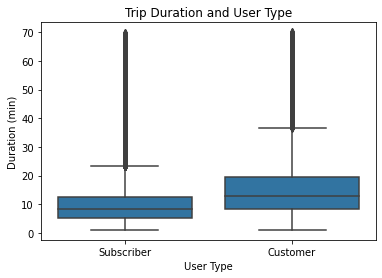

In [4]:
base_color = sb.color_palette()[0]
df3 = df.query("duration_min < 70")
sb.boxplot(data=df3, x='user_type', y='duration_min', color=base_color)
plt.xlabel('User Type')
plt.ylabel('Duration (min)')
plt.title('Trip Duration and User Type');

## Trip Duration and User Gender
 > the trip duration does not seem to be affected by user gender. The violin plot looks similar for the 3 gender categories, with the median all similar around 10 minutes.

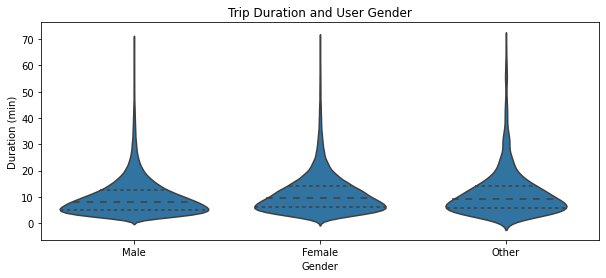

In [5]:
plt.figure(figsize=[10,4])
df2 = df.query("duration_min < 70")
base_color = sb.color_palette()[0]
sb.violinplot(data=df2, x='member_gender', y='duration_min', color=base_color, inner='quartile')
plt.xlabel('Gender')
plt.ylabel('Duration (min)')
plt.title('Trip Duration and User Gender');

## Trip Duration Across Gender and Age Group
 > In two gender types (male,female), the age range 10-20 has the longest trip duration, and in other type 30-40 has the longest trip duration between male and female. And in the rest age ranges all gender type are close with each other

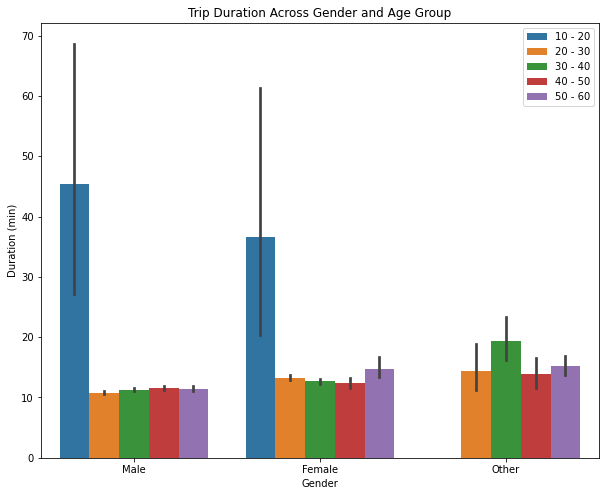

In [6]:
# calculate the age for the members
df.gg=[]
current_year=datetime.date.today().year
for i in df.member_birth_year:
    P = current_year - i
    df.gg.append(P)
    
df['age']=df.gg  
df5 = df[df['age']<=60]
df5['age_bins'] = df5['age'].apply(lambda y: '10 - 20' if 10<y<=20
                                                  else '20 - 30' if 20<y<=30
                                                  else '30 - 40' if 30<y<=40
                                                  else '40 - 50' if 40<y<=50
                                                  else '50 - 60' if 50<y<=60
                                                  else y)
plt.figure(figsize = [10, 8])

ex = sb.barplot(x='member_gender', y = 'duration_min', hue='age_bins', data=df5.sort_values(by= 'age_bins'))
plt.title('Trip Duration Across Gender and Age Group')
plt.xlabel('Gender')
plt.ylabel('Duration (min)')
leg = ex.legend()

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [ ]:
 !jupyter nbconvert slide_deck_template.ipynb --to slides --post serve  --no-input --no-prompt